# Wardrobe Data Processing Notebook

This notebook handles:
1. Loading and accessing wardrobe image data
2. Cleaning image data
3. Extracting useful information using pretrained models
4. Storing extracted data to CSV

## Step 1: Import Libraries and Load Image Data

In [25]:
import os
from pathlib import Path
import pandas as pd
from PIL import Image
import numpy as np
from typing import List, Dict
import matplotlib.pyplot as plt

# Set up paths
wardrobe_dir = Path('../../wardrobe-app/public/wardrobe')
print(f"Wardrobe directory: {wardrobe_dir}")
print(f"Directory exists: {wardrobe_dir.exists()}")

Wardrobe directory: ../../wardrobe-app/public/wardrobe
Directory exists: True


## Step 2: Load and Access Wardrobe Images

In [4]:
def load_wardrobe_images(directory: Path) -> Dict[str, Path]:
    """
    Load all image files from the wardrobe directory.
    
    Args:
        directory: Path to wardrobe directory
        
    Returns:
        Dictionary mapping image filename to image path
    """
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.webp'}
    images = {}
    
    if not directory.exists():
        raise FileNotFoundError(f"Wardrobe directory not found: {directory}")
    
    for img_path in directory.iterdir():
        if img_path.suffix.lower() in image_extensions and img_path.is_file():
            images[img_path.name] = img_path
    
    return images

# Load all images
wardrobe_images = load_wardrobe_images(wardrobe_dir)
print(f"Total images found: {len(wardrobe_images)}")
print(f"\nFirst 10 images:")
for idx, (filename, path) in enumerate(list(wardrobe_images.items())[:10]):
    print(f"  {idx + 1}. {filename}")

Total images found: 159

First 10 images:
  1. IMG_9030.jpg
  2. IMG_9024.jpg
  3. IMG_9018.jpg
  4. IMG_8925.jpg
  5. IMG_8931.jpg
  6. IMG_8930.jpg
  7. IMG_8924.jpg
  8. IMG_9019.jpg
  9. IMG_9025.jpg
  10. IMG_9031.jpg


## Step 3: Inspect Image Data

In [5]:
def get_image_metadata(image_path: Path) -> Dict:
    """
    Extract basic metadata from an image file.
    
    Args:
        image_path: Path to image file
        
    Returns:
        Dictionary containing image metadata
    """
    try:
        img = Image.open(image_path)
        return {
            'filename': image_path.name,
            'width': img.width,
            'height': img.height,
            'format': img.format,
            'mode': img.mode,
            'file_size_kb': image_path.stat().st_size / 1024,
            'path': str(image_path)
        }
    except Exception as e:
        print(f"Error processing {image_path.name}: {e}")
        return None

# Get metadata for all images
metadata_list = []
for filename, img_path in wardrobe_images.items():
    metadata = get_image_metadata(img_path)
    if metadata:
        metadata_list.append(metadata)

# Create DataFrame
image_metadata_df = pd.DataFrame(metadata_list)
print(f"Image metadata shape: {image_metadata_df.shape}")
print(f"\nFirst 5 rows:")
print(image_metadata_df.head())
print(f"\nDataset info:")
print(image_metadata_df.info())
print(f"\nBasic statistics:")
print(image_metadata_df[['width', 'height', 'file_size_kb']].describe())

Image metadata shape: (159, 7)

First 5 rows:
       filename  width  height format mode  file_size_kb  \
0  IMG_9030.jpg   4032    3024   JPEG  RGB   4364.036133   
1  IMG_9024.jpg   4032    3024   JPEG  RGB   2682.460938   
2  IMG_9018.jpg   4032    3024   JPEG  RGB   3030.239258   
3  IMG_8925.jpg   4032    3024   JPEG  RGB   3514.882812   
4  IMG_8931.jpg   4032    3024   JPEG  RGB   4202.547852   

                                              path  
0  ../../wardrobe-app/public/wardrobe/IMG_9030.jpg  
1  ../../wardrobe-app/public/wardrobe/IMG_9024.jpg  
2  ../../wardrobe-app/public/wardrobe/IMG_9018.jpg  
3  ../../wardrobe-app/public/wardrobe/IMG_8925.jpg  
4  ../../wardrobe-app/public/wardrobe/IMG_8931.jpg  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filename      159 non-null    object 
 1   width         159 non-

## Step 4: Visualize Sample Images

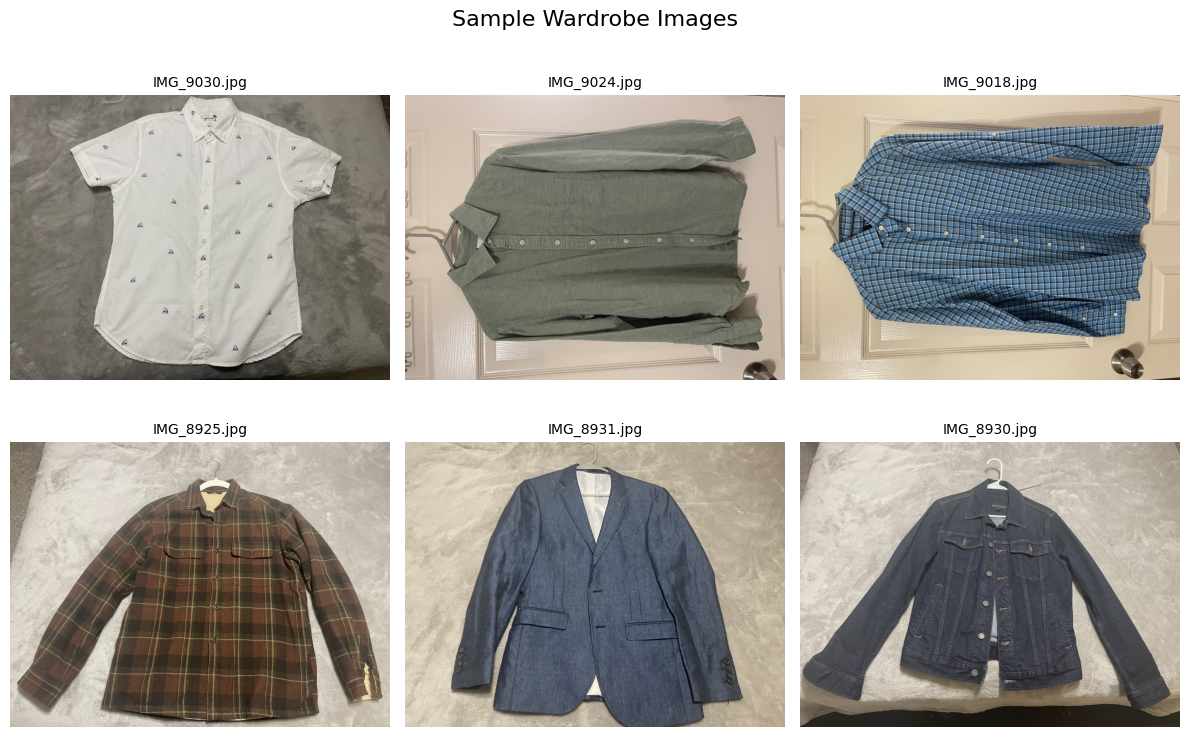

In [6]:
# Display sample images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Sample Wardrobe Images', fontsize=16)

sample_images = list(wardrobe_images.items())[:6]

for idx, (filename, img_path) in enumerate(sample_images):
    row = idx // 3
    col = idx % 3
    
    try:
        img = Image.open(img_path)
        axes[row, col].imshow(img)
        axes[row, col].set_title(filename, fontsize=10, wrap=True)
        axes[row, col].axis('off')
    except Exception as e:
        axes[row, col].text(0.5, 0.5, f'Error loading\n{filename}', ha='center', va='center')
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## Data Access Summary

### What we've done:
- ✅ Loaded all wardrobe images from `wardrobe-app/public/wardrobe/`
- ✅ Extracted basic image metadata (dimensions, format, file size)
- ✅ Created a DataFrame with image information
- ✅ Visualized sample images

### Next Steps (when ready):
1. **Data Cleaning**: Handle corrupted images, resize inconsistencies, remove duplicates
2. **Feature Extraction**: Use pretrained models (e.g., ResNet, ViT) to extract clothing attributes:
   - Color detection
   - Clothing type/category
   - Formality level
   - Material/texture
3. **Data Storage**: Save extracted features and metadata to CSV

### Current Variables Available:
- `wardrobe_images`: Dictionary of all image paths
- `image_metadata_df`: DataFrame with basic image information

In [10]:
!pip install pillow opencv-python-headless scikit-learn rembg torch torchvision ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
!pip install onnxruntime


  Cloning https://github.com/openai/CLIP.git to /private/var/folders/f4/l9khdym12gs8h3f_2l27p8yr0000gn/T/pip-req-build-7qk3ilt8
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /private/var/folders/f4/l9khdym12gs8h3f_2l27p8yr0000gn/T/pip-req-build-7qk3ilt8
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 42.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [onnxruntime] [onnxruntime]


In [26]:
import torch
import numpy as np
from PIL import Image
import cv2
from sklearn.cluster import KMeans
import clip
import rembg
from rembg import remove, new_session
import random


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [27]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

## BACKGROUND REMOVAL

In [29]:
def remove_background(img: Image.Image, session) -> Image.Image:
    out = remove(img, session=session)
    return out

In [41]:
SAMPLE_SIZE = 10
sample_images = random.sample(list(wardrobe_images.items()), SAMPLE_SIZE)

In [54]:
def clean_images(sample_images: list) -> List[Image.Image]:
    cleaned_images = []
    session = new_session("u2net")  # larger model 
    for filename, img_path in sample_images:
        img = Image.open(img_path).convert("RGB")
        img_clean = remove_background(img, session=session)
        cleaned_images.append((filename, img_clean))
    return cleaned_images

def display_sample_images(sample_images: list, cleaned_images: list):
    # Display sample images
    fig, axes = plt.subplots(SAMPLE_SIZE, 2, figsize=(16, 24))
    fig.suptitle('Sample Wardrobe Images', fontsize=16)

    session = new_session("u2net")          # larger model 

    #session = new_session("u2net_cloth_seg")  # best accuracy for clothes

    for i in range(len(sample_images)):
        filename, img_path = sample_images[i]
        filename_clean, img_clean = cleaned_images[i]
        row = i
        col, col_clean = 0, 1
        
        try:
            img = Image.open(img_path)
            axes[row, col].imshow(img)
            axes[row, col].set_title(filename, fontsize=10, wrap=True)
            axes[row, col].axis('off')

            #img_clean = Image.open(img_clean)
            axes[row, col_clean].imshow(img_clean)
            axes[row, col_clean].set_title(filename_clean, fontsize=10, wrap=True)
            axes[row, col_clean].axis('off')
        except Exception as e:
            axes[row, col].text(0.5, 0.5, f'Error loading\n{filename}', ha='center', va='center')
            axes[row, col].axis('off')
            axes[row, col_clean].text(0.5, 0.5, f'Error loading\n{filename}', ha='center', va='center')
            axes[row, col_clean].axis('off')

    plt.tight_layout()
    plt.show()

In [46]:
cleaned_images = clean_images(sample_images)

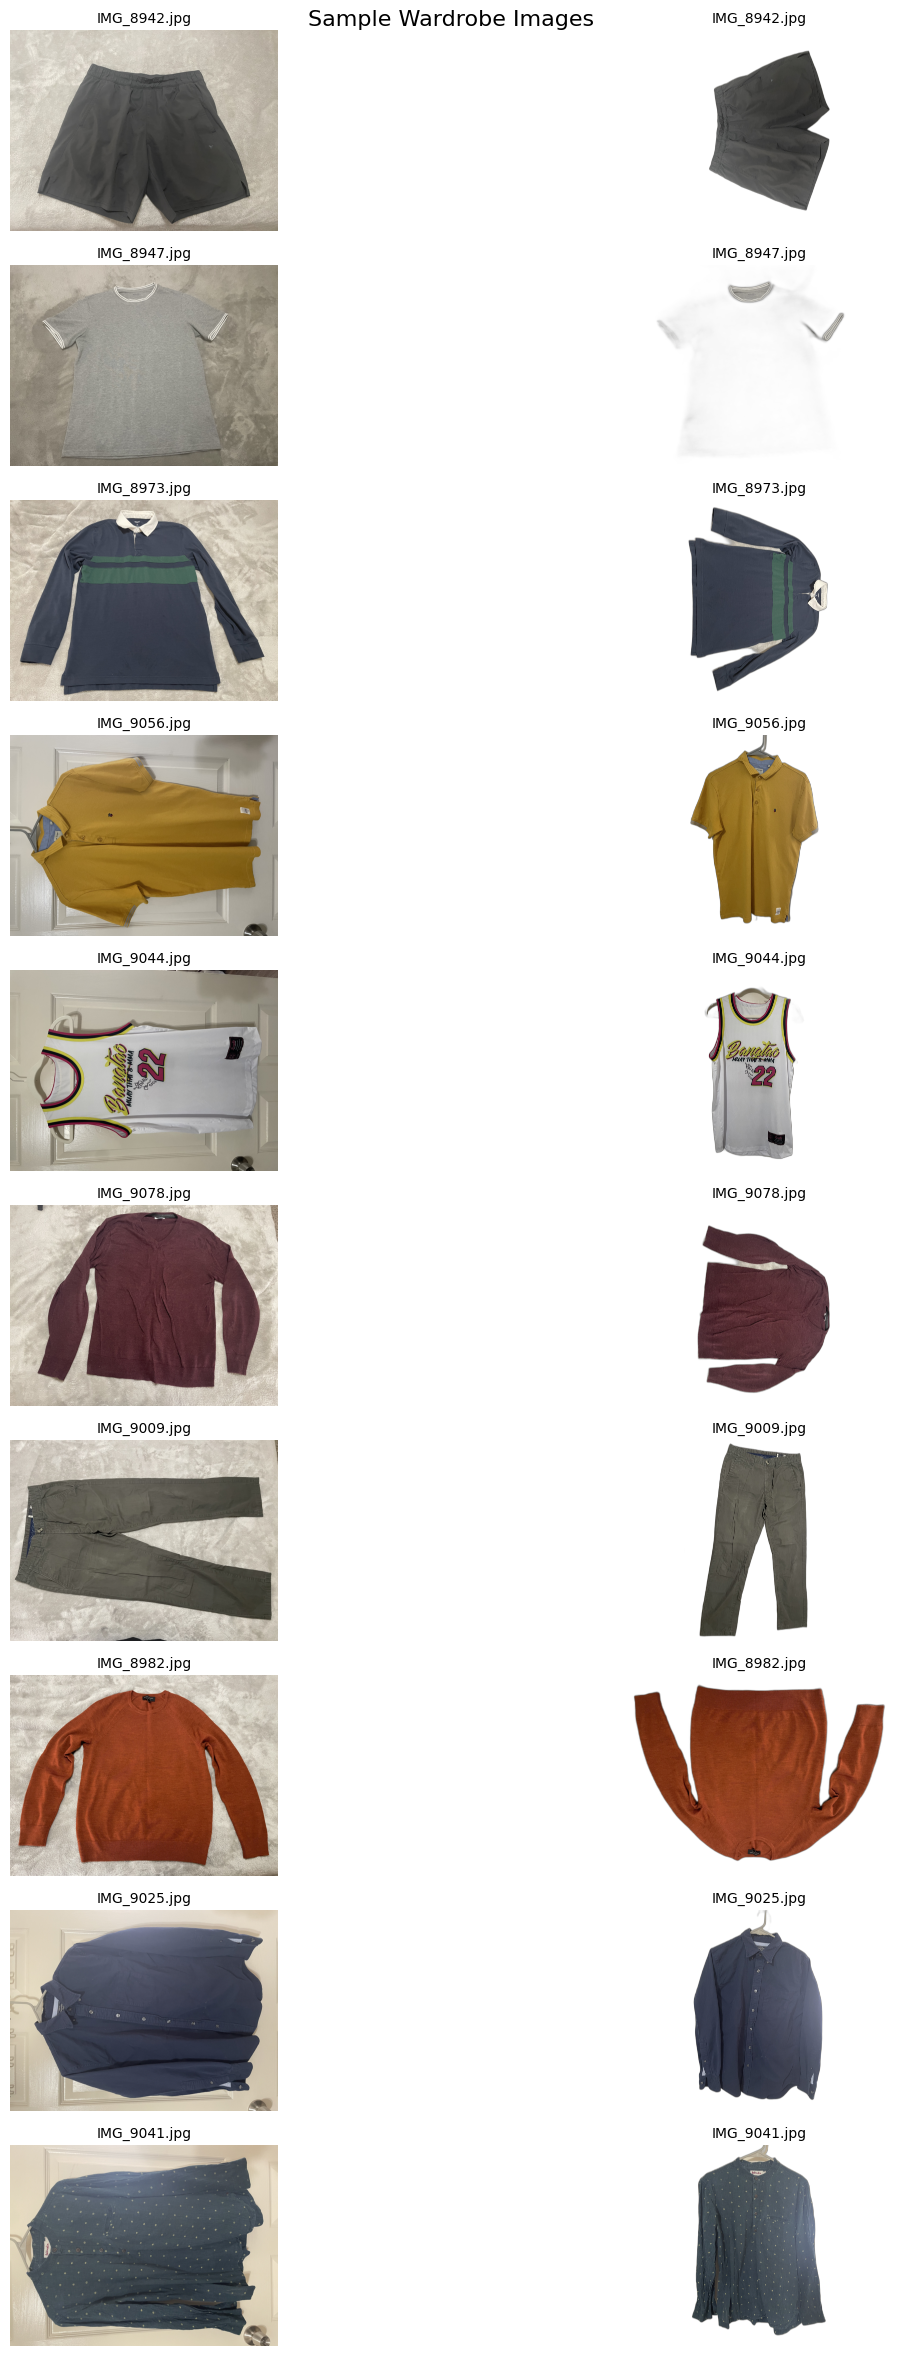

In [55]:
display_sample_images(sample_images, cleaned_images)

## COLOR EXTRACTION

In [63]:
cleaned_images

[('IMG_8942.jpg', <PIL.Image.Image image mode=RGBA size=3024x4032>),
 ('IMG_8947.jpg', <PIL.Image.Image image mode=RGBA size=4032x3024>),
 ('IMG_8973.jpg', <PIL.Image.Image image mode=RGBA size=3024x4032>),
 ('IMG_9056.jpg', <PIL.Image.Image image mode=RGBA size=3024x4032>),
 ('IMG_9044.jpg', <PIL.Image.Image image mode=RGBA size=3024x4032>),
 ('IMG_9078.jpg', <PIL.Image.Image image mode=RGBA size=3024x4032>),
 ('IMG_9009.jpg', <PIL.Image.Image image mode=RGBA size=3024x4032>),
 ('IMG_8982.jpg', <PIL.Image.Image image mode=RGBA size=4032x3024>),
 ('IMG_9025.jpg', <PIL.Image.Image image mode=RGBA size=3024x4032>),
 ('IMG_9041.jpg', <PIL.Image.Image image mode=RGBA size=3024x4032>)]

In [81]:
def extract_colors(images_list, k=3):
    """
    Extract colors from a list of images.
    
    Args:
        images_list: List of (filename, Image.Image) tuples
        k: Number of color clusters
        
    Returns:
        List of (filename, primary_color, secondary_color) tuples
    """
    results = []
    
    for filename, img in images_list:
        try:
            # Remove alpha channel (rembg outputs RGBA)
            if img.mode == "RGBA":
                img = img.convert("RGB")

            arr = np.array(img)

            # build a foreground mask: keep pixels that are not near-white
            # adjust threshold per your cleaned images
            gray = arr.mean(axis=2)
            mask = gray < 250    # 0–255; lower threshold means more strict

            fg_pixels = arr[mask]

            if len(fg_pixels) < k:
                # fallback: use all pixels
                fg_pixels = arr.reshape(-1, 3)

            kmeans = KMeans(n_clusters=k, n_init='auto').fit(fg_pixels)
            centers = np.uint8(kmeans.cluster_centers_)
            counts = np.bincount(kmeans.labels_)

            # return colors sorted by frequency
            order = np.argsort(counts)[::-1]
            sorted_colors = centers[order]
            
            primary_color = sorted_colors[0]
            secondary_color = sorted_colors[1] if len(sorted_colors) > 1 else primary_color
            
            results.append((img, primary_color, secondary_color))
        except Exception as e:
            print(f"Error processing {filename}: {e}")
            continue
    
    return results

In [82]:
color_results = extract_colors(cleaned_images[:4])
color_results

/opt/homebrew/Caskroom/miniconda/base/envs/outfit-transformer/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/outfit-transformer/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/outfit-transformer/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/outfit-transformer/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/homebrew/Caskroom/miniconda/base/envs/outfit-transformer/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/

[(<PIL.Image.Image image mode=RGB size=3024x4032>,
  array([0, 0, 0], dtype=uint8),
  array([61, 61, 59], dtype=uint8)),
 (<PIL.Image.Image image mode=RGB size=4032x3024>,
  array([2, 2, 2], dtype=uint8),
  array([128, 125, 119], dtype=uint8)),
 (<PIL.Image.Image image mode=RGB size=3024x4032>,
  array([61, 68, 79], dtype=uint8),
  array([0, 0, 0], dtype=uint8)),
 (<PIL.Image.Image image mode=RGB size=3024x4032>,
  array([0, 0, 0], dtype=uint8),
  array([129,  95,  26], dtype=uint8))]

In [83]:
def display_color_results(color_results, figsize=(16, 24)):
    """
    Display images with their extracted primary and secondary colors.
    
    Args:
        color_results: List of (filename, primary_color, secondary_color) tuples
        images_dict: Dictionary mapping filename to image path
        figsize: Figure size for plot
    """
    num_images = len(color_results)
    fig, axes = plt.subplots(num_images, 2, figsize=figsize)
    
    if num_images == 1:
        axes = axes.reshape(1, -1)
    
    fig.suptitle('Images with Extracted Colors', fontsize=16)
    
    for idx, (img_clean, primary_color, secondary_color) in enumerate(color_results):
        
        # Display cleaned image
        # img = Image.open(img_path).convert("RGB")
        # img_clean = remove_background(img)
        
        axes[idx, 0].imshow(img_clean)
        axes[idx, 0].set_title(f'{filename}', fontsize=12)
        axes[idx, 0].axis('off')
        
        # Display color swatches with labels
        ax_colors = axes[idx, 1]
        color_display = np.zeros((100, 200, 3), dtype=np.uint8)
        color_display[:, :100] = primary_color
        color_display[:, 100:] = secondary_color
        
        ax_colors.imshow(color_display)
        ax_colors.set_title(f'Primary: RGB{tuple(primary_color)}\nSecondary: RGB{tuple(secondary_color)}', fontsize=10)
        ax_colors.axis('off')
    
    plt.tight_layout()
    plt.show()

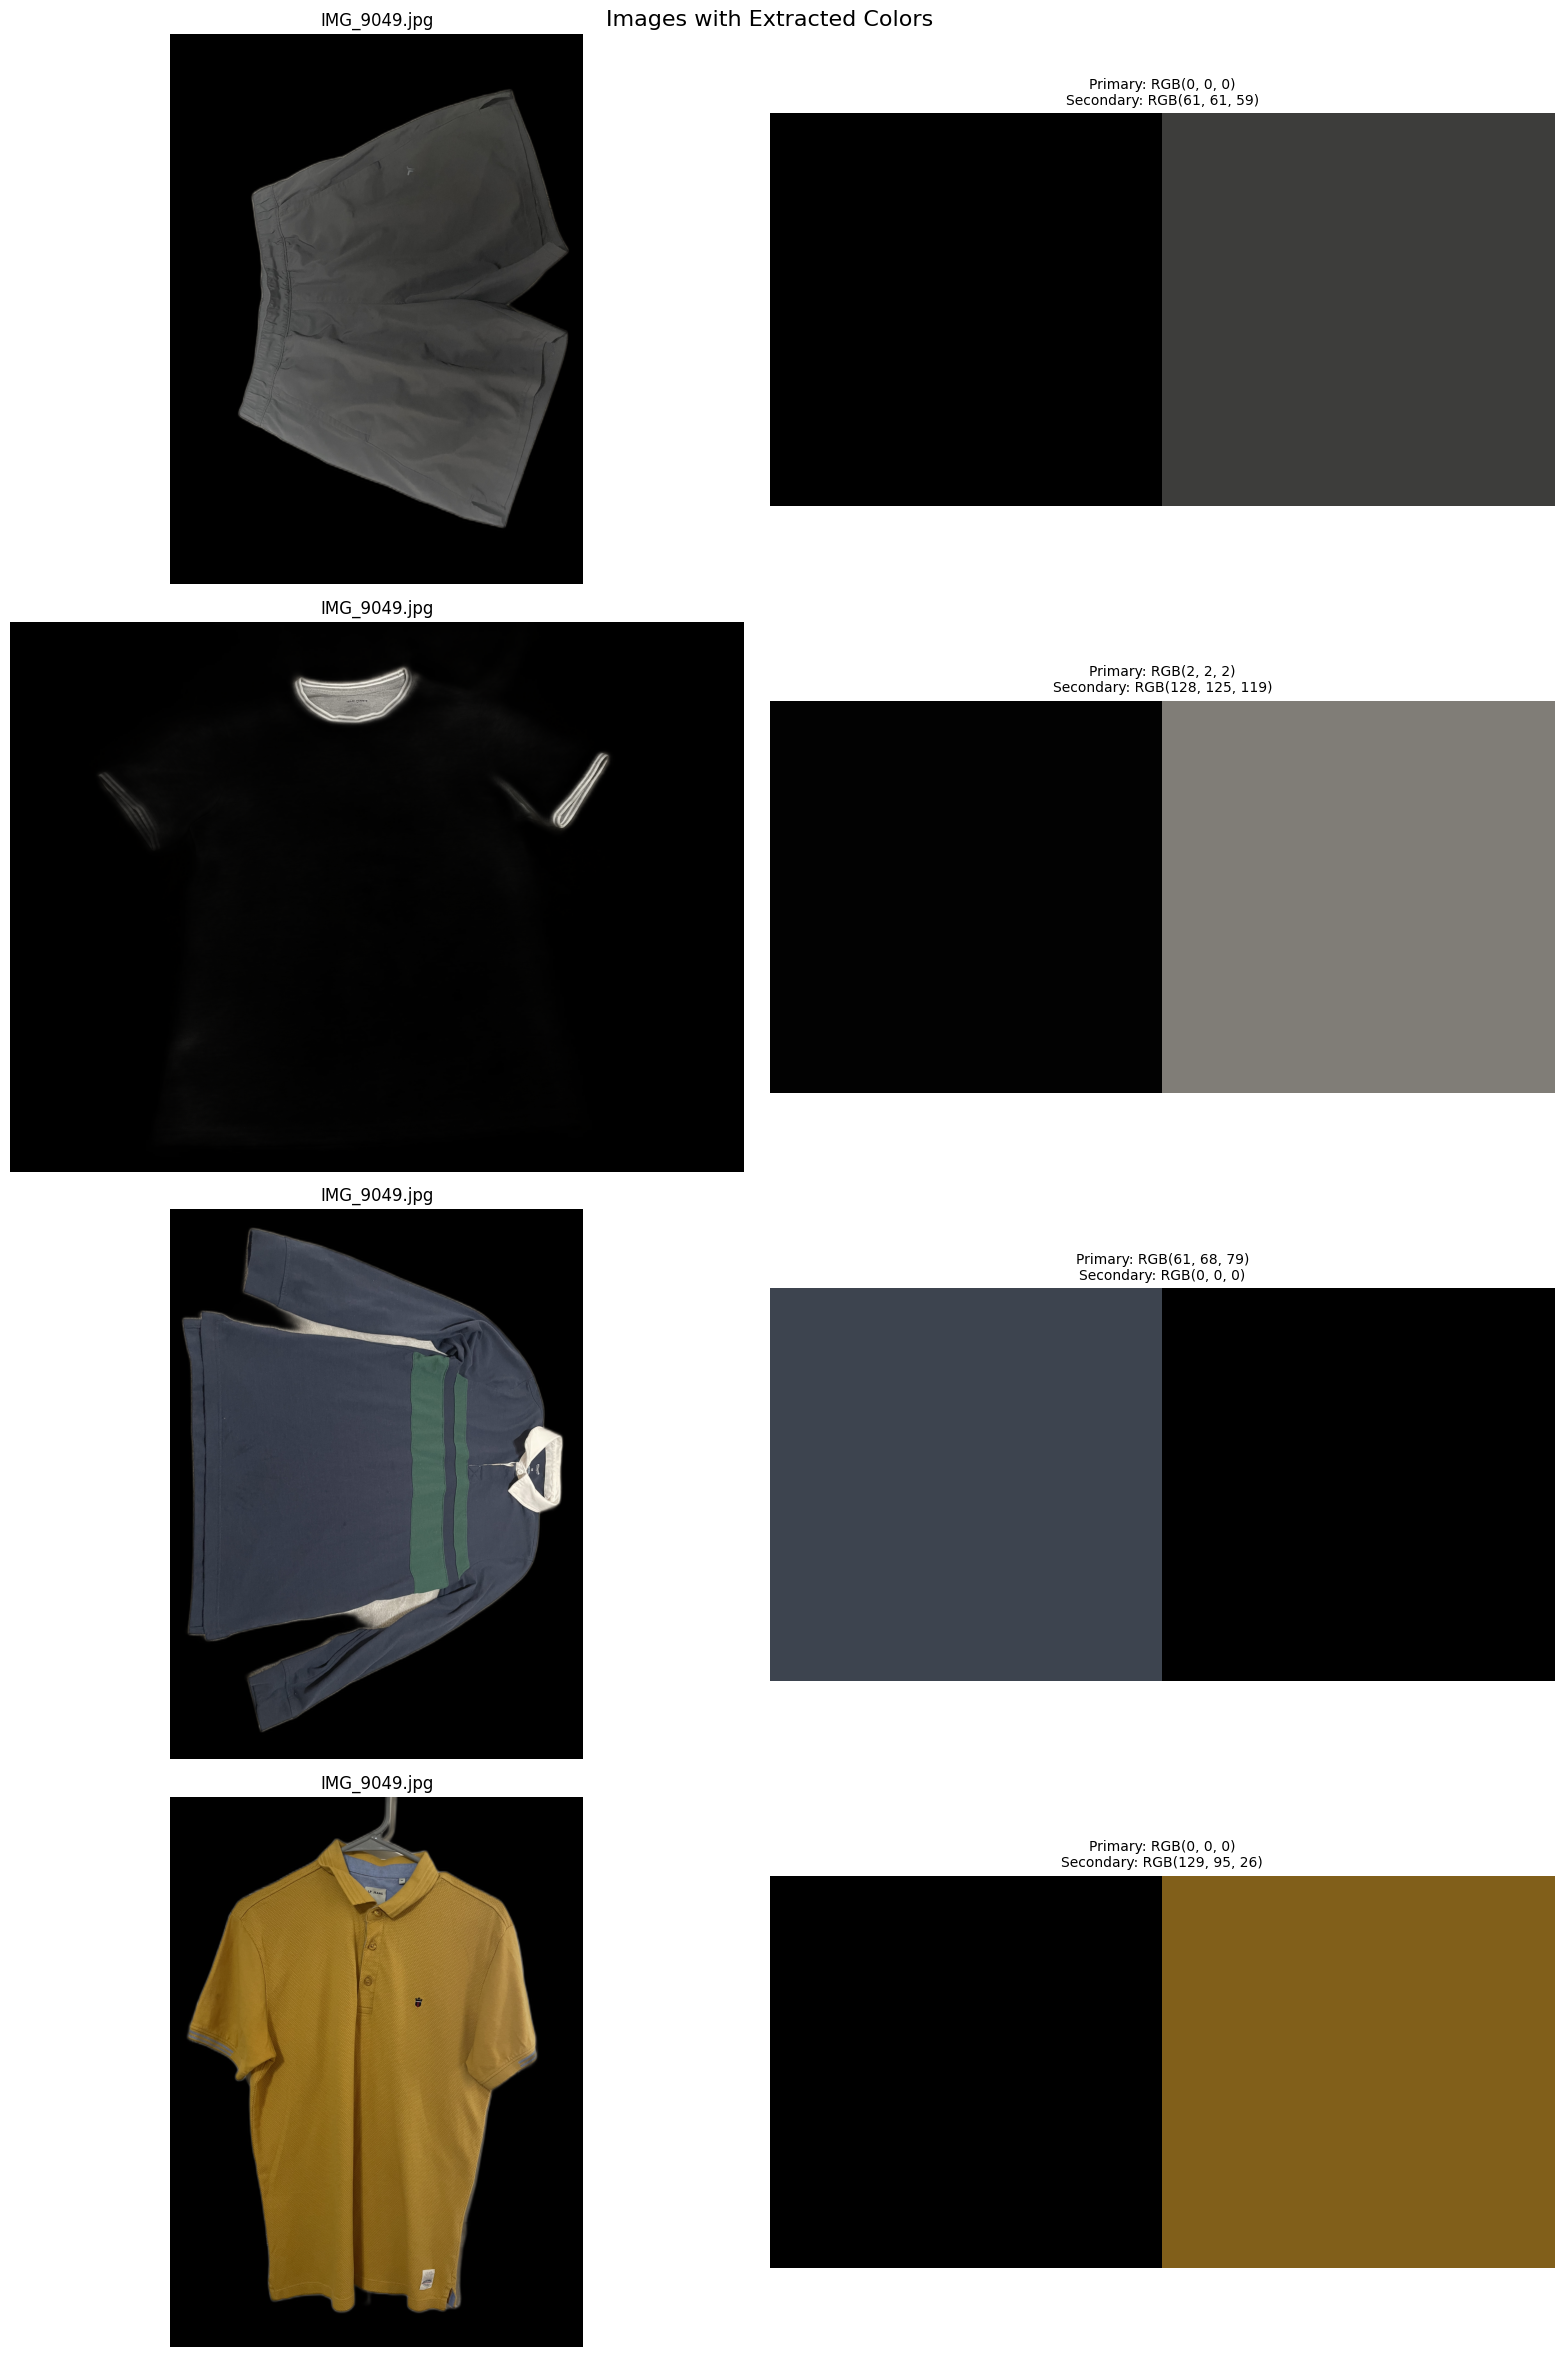

In [84]:

display_color_results(color_results)

## Step 5: Metadata CSV for image access

In [4]:
def create_metadata_csv(wardrobe_dir: Path, output_csv_path: Path) -> pd.DataFrame:
    """
    Create a metadata CSV file with image name, path, and category.
    
    Args:
        wardrobe_dir: Path to wardrobe directory containing subdirectories
        output_csv_path: Path where to save the CSV file
        
    Returns:
        DataFrame with metadata
    """
    metadata = []
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.webp'}
    
    # Recursively find all images and their categories (subdirectories)
    for img_path in wardrobe_dir.rglob('*'):
        if img_path.suffix.lower() in image_extensions and img_path.is_file():
            # Get the immediate parent directory (category)
            category = img_path.parent.name
            
            # Get relative path from wardrobe directory
            relative_path = img_path.relative_to(wardrobe_dir)
            web_path = relative_path.as_posix()
            
            # Get image name without extension
            image_name = img_path.stem
            
            metadata.append({
                'image_name': image_name,
                'image_path': web_path,
                'item_category': category
            })
    
    # Create DataFrame
    df = pd.DataFrame(metadata)
    
    # Sort by category then image name for better organization
    df = df.sort_values(['item_category', 'image_name']).reset_index(drop=True)
    
    # Save to CSV
    df.to_csv(output_csv_path, index=False)
    
    print(f"✓ Metadata CSV created: {output_csv_path}")
    print(f"✓ Total images: {len(df)}")
    print(f"✓ Categories found: {df['item_category'].unique().tolist()}")
    
    return df

# Create metadata CSV
csv_output_path = Path('../../wardrobe-app/public/metadata.csv')
metadata_df = create_metadata_csv(wardrobe_dir, csv_output_path)

print(f"\nFirst 10 rows:")
print(metadata_df.head(10))
print(f"\nDataFrame shape: {metadata_df.shape}")
print(f"\nCategory distribution:")
print(metadata_df['item_category'].value_counts())

✓ Metadata CSV created: ../../wardrobe-app/public/metadata.csv
✓ Total images: 159
✓ Categories found: ['Accessories', 'Bottoms', 'Outerwear', 'Shoes', 'Tops']

First 10 rows:
  image_name                image_path item_category
0   IMG_8983  Accessories/IMG_8983.jpg   Accessories
1   IMG_8984  Accessories/IMG_8984.jpg   Accessories
2   IMG_8985  Accessories/IMG_8985.jpg   Accessories
3   IMG_8987  Accessories/IMG_8987.jpg   Accessories
4   IMG_8988  Accessories/IMG_8988.jpg   Accessories
5   IMG_8996  Accessories/IMG_8996.jpg   Accessories
6   IMG_8942      Bottoms/IMG_8942.jpg       Bottoms
7   IMG_8946      Bottoms/IMG_8946.jpg       Bottoms
8   IMG_8962      Bottoms/IMG_8962.jpg       Bottoms
9   IMG_8966      Bottoms/IMG_8966.jpg       Bottoms

DataFrame shape: (159, 3)

Category distribution:
item_category
Tops           80
Outerwear      31
Bottoms        24
Shoes          18
Accessories     6
Name: count, dtype: int64


In [5]:
# Add ID column to metadata CSV
csv_path = Path('../../wardrobe-app/public/metadata.csv')
metadata_df = pd.read_csv(csv_path)

# Add ID column at the beginning
metadata_df.insert(0, 'id', range(1, len(metadata_df) + 1))

# Save updated CSV
metadata_df.to_csv(csv_path, index=False)

print(f"✓ Added ID column to metadata.csv")
print(f"✓ ID range: {metadata_df['id'].min()} to {metadata_df['id'].max()}")
print(f"\nFirst 10 rows:")
print(metadata_df.head(10))

✓ Added ID column to metadata.csv
✓ ID range: 1 to 159

First 10 rows:
   id image_name                image_path item_category
0   1   IMG_8983  Accessories/IMG_8983.jpg   Accessories
1   2   IMG_8984  Accessories/IMG_8984.jpg   Accessories
2   3   IMG_8985  Accessories/IMG_8985.jpg   Accessories
3   4   IMG_8987  Accessories/IMG_8987.jpg   Accessories
4   5   IMG_8988  Accessories/IMG_8988.jpg   Accessories
5   6   IMG_8996  Accessories/IMG_8996.jpg   Accessories
6   7   IMG_8942      Bottoms/IMG_8942.jpg       Bottoms
7   8   IMG_8946      Bottoms/IMG_8946.jpg       Bottoms
8   9   IMG_8962      Bottoms/IMG_8962.jpg       Bottoms
9  10   IMG_8966      Bottoms/IMG_8966.jpg       Bottoms


## Step 6: Compute CLIP ViT-B/32 Embeddings

In [28]:
import clip
import torch

In [29]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

In [30]:
# Load CLIP model
model, preprocess = clip.load("ViT-B/32", device=device)
print(f"✓ Loaded CLIP ViT-B/32 model on device: {device}")
print(f"✓ Embedding dimension: 512")

# Read metadata to get image paths and IDs
metadata_df = pd.read_csv(Path('../../wardrobe-app/public/metadata.csv'))
wardrobe_dir = Path('../../wardrobe-app/public/wardrobe')

# Initialize embeddings array (num_images x 512)
num_images = len(metadata_df)
embeddings = np.zeros((num_images, 512), dtype=np.float32)

print(f"\nComputing embeddings for {num_images} images...")

# Compute embeddings for each image
for idx, row in metadata_df.iterrows():
    item_id = row['id']
    image_path = wardrobe_dir / row['image_path']
    
    try:
        # Load and preprocess image
        img = Image.open(image_path).convert("RGB")
        img_tensor = preprocess(img).unsqueeze(0).to(device)
        
        # Get embedding (no gradients needed)
        with torch.no_grad():
            image_embedding = model.encode_image(img_tensor)
            # Normalize embedding
            image_embedding = image_embedding / image_embedding.norm(dim=-1, keepdim=True)
        
        # Store in array at index corresponding to ID
        embeddings[item_id - 1] = image_embedding.cpu().numpy().astype(np.float32)
        
        if (idx + 1) % 20 == 0:
            print(f"  Processed {idx + 1}/{num_images} images...")
            
    except Exception as e:
        print(f"  ⚠ Error processing {image_path.name}: {e}")
        # Use zero embedding as fallback
        embeddings[item_id - 1] = np.zeros(512, dtype=np.float32)

# Save embeddings
embeddings_path = Path('../../wardrobe-app/public/vit_embeddings.npy')
np.save(embeddings_path, embeddings)

print(f"\n✓ Embeddings saved to: {embeddings_path}")
print(f"✓ Shape: {embeddings.shape}")
print(f"✓ Data type: {embeddings.dtype}")
print(f"✓ File size: {embeddings_path.stat().st_size / (1024*1024):.2f} MB")

✓ Loaded CLIP ViT-B/32 model on device: mps
✓ Embedding dimension: 512

Computing embeddings for 161 images...
  Processed 20/161 images...
  Processed 40/161 images...
  Processed 60/161 images...
  Processed 80/161 images...
  Processed 100/161 images...
  Processed 120/161 images...
  Processed 140/161 images...
  Processed 160/161 images...

✓ Embeddings saved to: ../../wardrobe-app/public/vit_embeddings.npy
✓ Shape: (161, 512)
✓ Data type: float32
✓ File size: 0.31 MB


## Step 7: Compute FashionCLIP Embeddings

In [17]:
!pip install git+https://github.com/patrickjohncyh/fashion-clip.git

  Cloning https://github.com/patrickjohncyh/fashion-clip.git to /private/var/folders/f4/l9khdym12gs8h3f_2l27p8yr0000gn/T/pip-req-build-uxpeo9eu
  Running command git clone --filter=blob:none --quiet https://github.com/patrickjohncyh/fashion-clip.git /private/var/folders/f4/l9khdym12gs8h3f_2l27p8yr0000gn/T/pip-req-build-uxpeo9eu
  Resolved https://github.com/patrickjohncyh/fashion-clip.git to commit 0b4b4f9c7e0e6adfe3f2e75809f3f1e84f5ba76a
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.1 MB/s eta 0:00:00m-:--:--
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 28.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 38.9 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Building 'fashion-clip' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use t

In [31]:
from fashion_clip.fashion_clip import FashionCLIP

# Load FashionCLIP model
fclip = FashionCLIP(model_name='fashion-clip')
print(f"✓ Loaded FashionCLIP model on device: {device}")
print(f"✓ Embedding dimension: 512")

# Read metadata to get image paths and IDs
metadata_df = pd.read_csv(Path('../../wardrobe-app/public/metadata.csv'))
wardrobe_dir = Path('../../wardrobe-app/public/wardrobe')

# Initialize embeddings array (num_images x 512)
num_images = len(metadata_df)
fashion_embeddings = np.zeros((num_images, 512), dtype=np.float32)

print(f"\nComputing FashionCLIP embeddings for {num_images} images...")

# Process in batches for efficiency
batch_size = 32
image_paths_batch = []
ids_batch = []

for idx, row in metadata_df.iterrows():
    item_id = row['id']
    image_path = str(wardrobe_dir / row['image_path'])
    
    image_paths_batch.append(image_path)
    ids_batch.append(item_id)
    
    # Process batch when full or at end of data
    if len(image_paths_batch) == batch_size or idx == len(metadata_df) - 1:
        try:
            # Get embeddings for batch
            with torch.no_grad():
                batch_embeddings = fclip.encode_images(image_paths_batch, batch_size=batch_size)
                # Normalize embeddings to unit norm
                batch_embeddings = batch_embeddings / np.linalg.norm(batch_embeddings, ord=2, axis=-1, keepdims=True)
            
            # Store in array at indices corresponding to IDs
            for i, item_id in enumerate(ids_batch):
                fashion_embeddings[item_id - 1] = batch_embeddings[i].astype(np.float32)
            
            print(f"  Processed {idx + 1}/{num_images} images...")
            
        except Exception as e:
            print(f"  ⚠ Error processing batch: {e}")
            # Use zero embeddings as fallback
            for i, item_id in enumerate(ids_batch):
                fashion_embeddings[item_id - 1] = np.zeros(512, dtype=np.float32)
        
        # Reset batch
        image_paths_batch = []
        ids_batch = []

# Save embeddings
fashion_embeddings_path = Path('../../wardrobe-app/public/fashion_embeddings.npy')
np.save(fashion_embeddings_path, fashion_embeddings)

print(f"\n✓ Normalized FashionCLIP embeddings saved to: {fashion_embeddings_path}")
print(f"✓ Shape: {fashion_embeddings.shape}")
print(f"✓ Data type: {fashion_embeddings.dtype}")
print(f"✓ File size: {fashion_embeddings_path.stat().st_size / (1024*1024):.2f} MB")

'(ProtocolError('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')), '(Request ID: 3124f385-204f-4f41-a961-50ee037de70b)')' thrown while requesting HEAD https://huggingface.co/patrickjohncyh/fashion-clip/resolve/main/config.json
Retrying in 1s [Retry 1/5].


✓ Loaded FashionCLIP model on device: mps
✓ Embedding dimension: 512

Computing FashionCLIP embeddings for 161 images...


100%|██████████| 1/1 [00:03<00:00,  3.54s/it]


  Processed 32/161 images...


100%|██████████| 1/1 [00:03<00:00,  3.48s/it]


  Processed 64/161 images...


100%|██████████| 1/1 [00:03<00:00,  3.37s/it]


  Processed 96/161 images...


100%|██████████| 1/1 [00:03<00:00,  3.27s/it]


  Processed 128/161 images...


100%|██████████| 1/1 [00:03<00:00,  3.22s/it]


  Processed 160/161 images...


1it [00:00,  7.31it/s]

  Processed 161/161 images...

✓ Normalized FashionCLIP embeddings saved to: ../../wardrobe-app/public/fashion_embeddings.npy
✓ Shape: (161, 512)
✓ Data type: float32
✓ File size: 0.31 MB


In [21]:
print(dir(fclip))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_cosine_similarity', '_generate_vectors', '_get_heatmap', '_load_model', '_nearest_neighbours', 'approx', 'dataset', 'device', 'display_attention', 'encode_images', 'encode_text', 'model', 'model_hash', 'model_name', 'preprocess', 'retrieval', 'zero_shot_classification']


## Step 8: Generate Weather Label Classifications Using Embeddings

In [51]:
# Load embeddings and metadata
embeddings = np.load(Path('../../wardrobe-app/public/vit_embeddings.npy'))
metadata_df = pd.read_csv(Path('../../wardrobe-app/public/metadata.csv'))

# Define weather labels and their embeddings
weather_labels = {
    'HOT': 0b0001,      # Binary: 0001
    'COLD': 0b0010,     # Binary: 0010
    'RAINY': 0b0100     # Binary: 0100
}

# Define text descriptions for each weather condition (to embed with CLIP)
label_texts = {
    'HOT': 'hot weather clothing',
    'COLD': 'cold weather clothing',
    'RAINY': 'rainy weather clothing'
}

print("Computing CLIP embeddings for weather labels...")

# Get CLIP embeddings for label texts
label_embeddings = {}
for label_name, label_text in label_texts.items():
    with torch.no_grad():
        text_tokens = clip.tokenize(label_text).to(device)
        text_embedding = model.encode_text(text_tokens)
        # Normalize
        text_embedding = text_embedding / text_embedding.norm(dim=-1, keepdim=True)
    label_embeddings[label_name] = text_embedding.cpu().numpy().astype(np.float32).squeeze()
    print(f"  ✓ {label_name}: {label_embeddings[label_name].shape}")

# Initialize labels array (num_images)
image_labels = np.zeros(len(metadata_df), dtype=np.uint32)

# Similarity threshold
THRESHOLD = 0.24

print(f"\nComputing cosine similarity with threshold {THRESHOLD}...")

# Compute similarities and assign labels
label_stats = {label: 0 for label in weather_labels.keys()}

for idx, image_embedding in enumerate(embeddings):
    image_id = idx + 1
    label_value = 0
    
    for label_name, label_embedding in label_embeddings.items():
        # Compute dot product (cosine similarity for normalized embeddings)
        similarity = np.dot(image_embedding, label_embedding)
        
        if similarity >= THRESHOLD:
            # Assign label using bitwise OR
            label_value |= weather_labels[label_name]
            label_stats[label_name] += 1
    
    image_labels[idx] = label_value

# Add labels to metadata
metadata_df['weather_label'] = image_labels

# Save updated metadata with labels
metadata_path = Path('../../wardrobe-app/public/metadata.csv')
metadata_df.to_csv(metadata_path, index=False)

print(f"\n✓ Weather labels assigned to all {len(metadata_df)} images")
print(f"\n=== LABEL ASSIGNMENT STATISTICS ===")
for label_name, count in label_stats.items():
    percentage = (count / len(metadata_df)) * 100
    print(f"{label_name:10s}: {count:3d} images ({percentage:5.1f}%)")

print(f"\nImages with multiple labels: {(image_labels > 0).sum() - sum(bin(x).count('1') == 1 for x in image_labels if x > 0)}")
print(f"Images with no labels: {(image_labels == 0).sum()}")

# Show sample of labeled images
print(f"\n=== SAMPLE LABELED IMAGES ===")
sample_df = metadata_df[metadata_df['weather_label'] > 0].head(10)[['id', 'image_name', 'item_category', 'weather_label']]
print(sample_df.to_string())


Computing CLIP embeddings for weather labels...
  ✓ HOT: (512,)
  ✓ COLD: (512,)
  ✓ RAINY: (512,)

Computing cosine similarity with threshold 0.24...

✓ Weather labels assigned to all 159 images

=== LABEL ASSIGNMENT STATISTICS ===
HOT       :  75 images ( 47.2%)
COLD      :  87 images ( 54.7%)
RAINY     :  53 images ( 33.3%)

Images with multiple labels: 62
Images with no labels: 43

=== SAMPLE LABELED IMAGES ===
   id image_name item_category  weather_label
0   1   IMG_8983   Accessories              2
1   2   IMG_8984   Accessories              2
2   3   IMG_8985   Accessories              2
3   4   IMG_8987   Accessories              2
4   5   IMG_8988   Accessories              2
5   6   IMG_8996   Accessories              2
6   7   IMG_8942       Bottoms              1
7   8   IMG_8946       Bottoms              7
8   9   IMG_8962       Bottoms              1
9  10   IMG_8966       Bottoms              7


In [43]:
# Load metadata
metadata_df = pd.read_csv(Path('../../wardrobe-app/public/metadata.csv'))

# Drop the weather_label column
metadata_df = metadata_df.drop('weather_label', axis=1)

# Save updated metadata
metadata_df.to_csv(Path('../../wardrobe-app/public/metadata.csv'), index=False)

print("✓ Dropped 'weather_label' column from metadata.csv")
print(f"✓ Remaining columns: {metadata_df.columns.tolist()}")

✓ Dropped 'weather_label' column from metadata.csv
✓ Remaining columns: ['id', 'image_name', 'image_path', 'item_category']


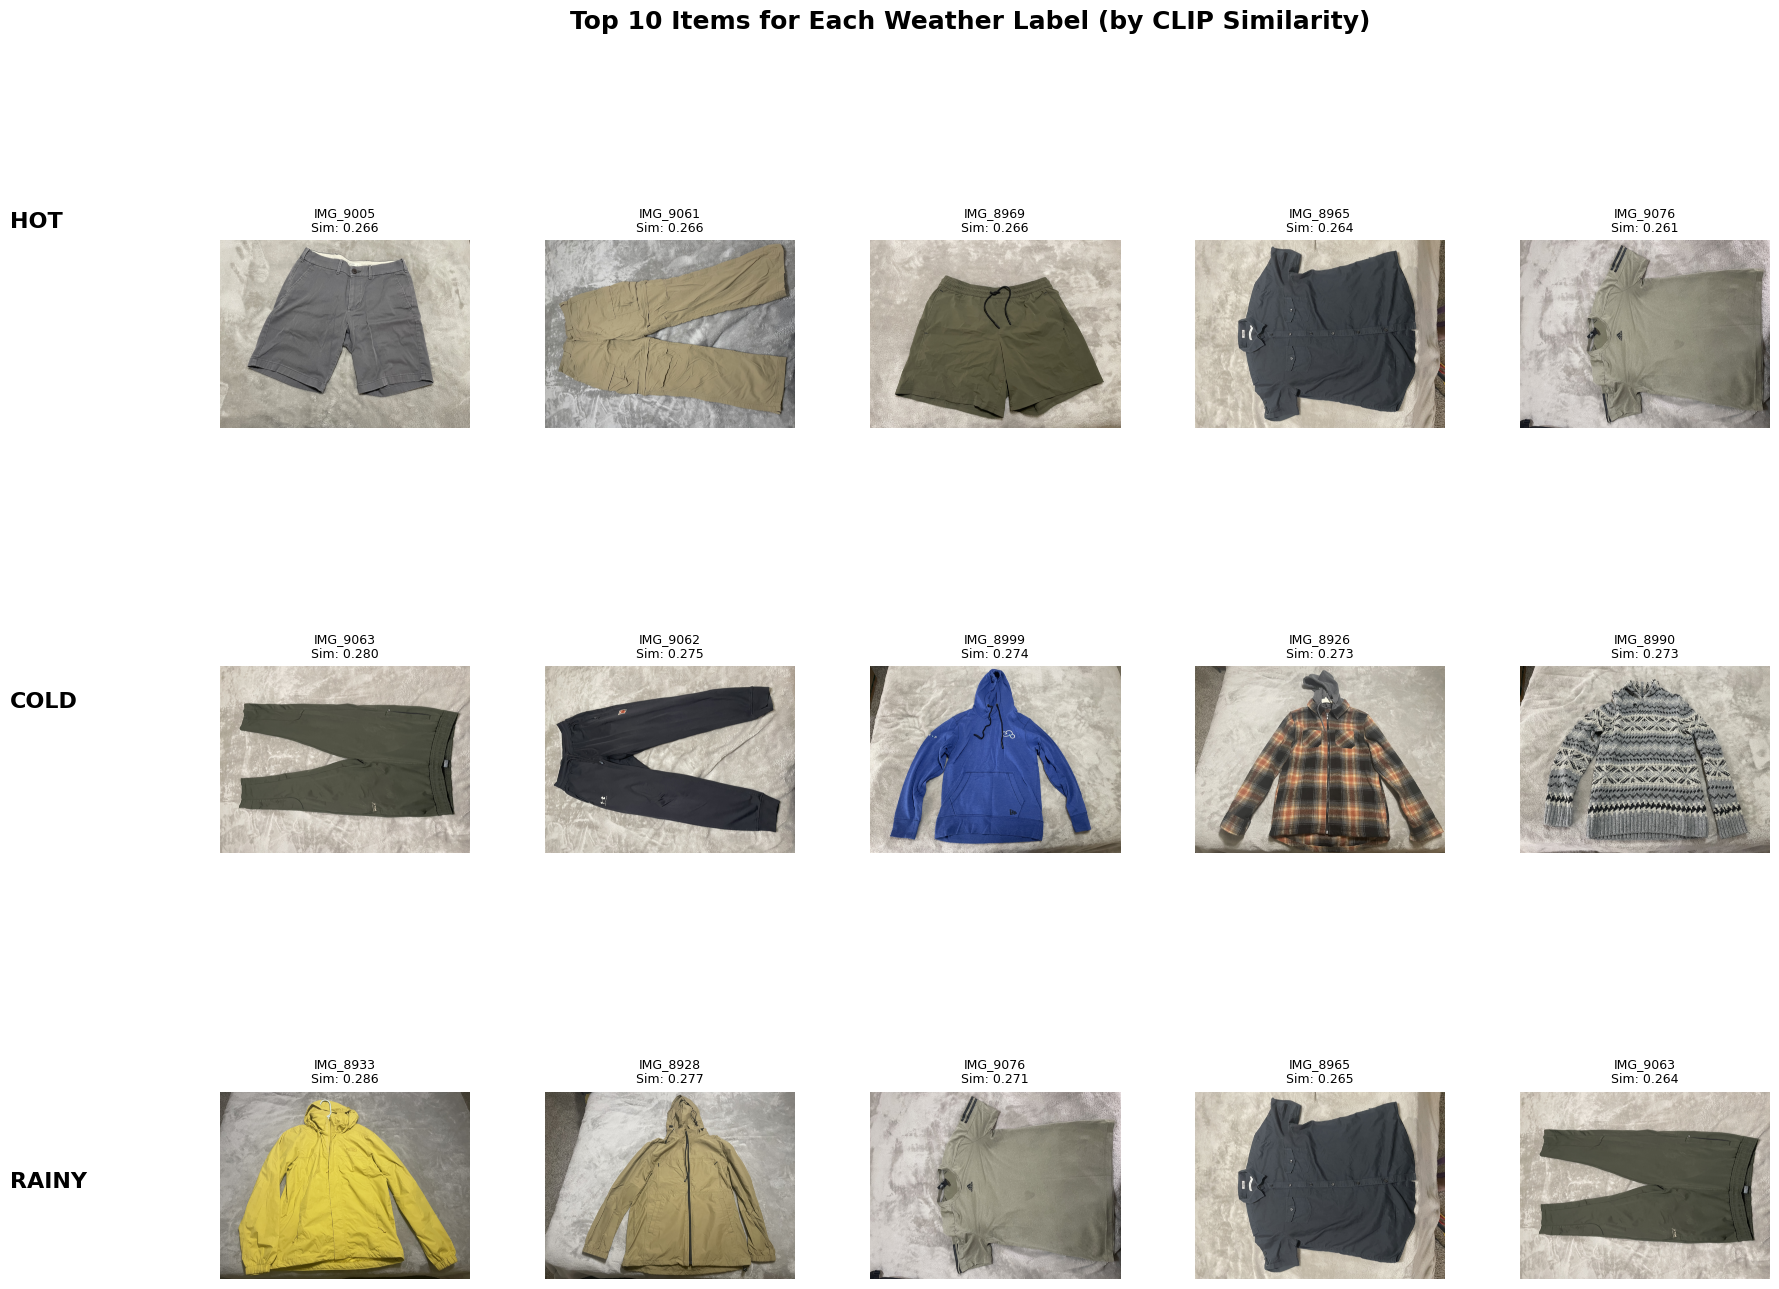

In [55]:
from matplotlib.gridspec import GridSpec

# Load metadata and embeddings
metadata_df = pd.read_csv(Path('../../wardrobe-app/public/metadata.csv'))
embeddings = np.load(Path('../../wardrobe-app/public/vit_embeddings.npy'))
wardrobe_dir = Path('../../wardrobe-app/public/wardrobe')

# Define weather labels
label_texts = {
    'HOT': 'hot weather clothing',
    'COLD': 'cold weather clothing',
    'RAINY': 'rainy weather clothing'
}

# Get CLIP embeddings for labels
label_embeddings = {}
for label_name, label_text in label_texts.items():
    with torch.no_grad():
        text_tokens = clip.tokenize(label_text).to(device)
        text_embedding = model.encode_text(text_tokens)
        text_embedding = text_embedding / text_embedding.norm(dim=-1, keepdim=True)
    label_embeddings[label_name] = text_embedding.cpu().numpy().astype(np.float32).squeeze()

# Create figure with subplots for each label
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(3, 5, figure=fig, hspace=0.4, wspace=0.3)

label_names = list(label_embeddings.keys())

for label_idx, label_name in enumerate(label_names):
    label_embedding = label_embeddings[label_name]
    
    # Compute similarities
    similarities = np.dot(embeddings, label_embedding)
    
    # Get top 5 indices
    top_5_indices = np.argsort(similarities)[::-1][:5]
    
    # Plot top 10 images for this label
    for i, img_idx in enumerate(top_5_indices):
        ax = fig.add_subplot(gs[label_idx, i])
        
        # Get image path
        row = metadata_df.iloc[img_idx]
        image_path = wardrobe_dir / row['image_path']
        
        try:
            # Load and display image
            img = Image.open(image_path)
            ax.imshow(img)
            ax.set_title(f"{row['image_name']}\nSim: {similarities[img_idx]:.3f}", fontsize=9)
            ax.axis('off')
        except Exception as e:
            ax.text(0.5, 0.5, f"Error\n{row['image_name']}", ha='center', va='center')
            ax.axis('off')
    
    # Add label title to the row
    fig.text(0.02, 0.85 - label_idx * 0.32, label_name, fontsize=16, fontweight='bold', rotation=0)

plt.suptitle('Top 10 Items for Each Weather Label (by CLIP Similarity)', fontsize=18, fontweight='bold', y=0.995)
plt.show()

In [ ]:
# Load embeddings and metadata
embeddings = np.load(Path('../../wardrobe-app/public/vit_embeddings.npy'))
metadata_df = pd.read_csv(Path('../../wardrobe-app/public/metadata.csv'))

# Define weather labels and their embeddings
formality_labels = {
    'CASUAL': 0b0001,      # Binary: 0001
    'FORMAL': 0b0010,     # Binary: 0010
    'SPORTS': 0b0100,     # Binary: 0100
    'PARTY': 0b1000     # Binary: 0100
}

# Define text descriptions for each weather condition (to embed with CLIP)
label_texts = {
    'CASUAL': 'lounging wear',
    'FORMAL': 'formal wear',
    'SPORTS': 'exercise clothes',
    'PARTY': 'party wear'
}

print("Computing CLIP embeddings for formality labels...")

# Get CLIP embeddings for label texts
label_embeddings = {}
for label_name, label_text in label_texts.items():
    with torch.no_grad():
        text_tokens = clip.tokenize(label_text).to(device)
        text_embedding = model.encode_text(text_tokens)
        # Normalize
        text_embedding = text_embedding / text_embedding.norm(dim=-1, keepdim=True)
    label_embeddings[label_name] = text_embedding.cpu().numpy().astype(np.float32).squeeze()
    print(f"  ✓ {label_name}: {label_embeddings[label_name].shape}")

# Initialize labels array (num_images)
image_labels = np.zeros(len(metadata_df), dtype=np.uint32)

# Similarity threshold
THRESHOLD = 0.23

print(f"\nComputing cosine similarity with threshold {THRESHOLD}...")

# Compute similarities and assign labels
label_stats = {label: 0 for label in weather_labels.keys()}

for idx, image_embedding in enumerate(embeddings):
    image_id = idx + 1
    label_value = 0
    
    for label_name, label_embedding in label_embeddings.items():
        # Compute dot product (cosine similarity for normalized embeddings)
        similarity = np.dot(image_embedding, label_embedding)
        
        if similarity >= THRESHOLD:
            # Assign label using bitwise OR
            label_value |= formality_labels[label_name]
            label_stats[label_name] += 1
    
    image_labels[idx] = label_value

# Add labels to metadata
metadata_df['formality_label'] = image_labels

# Save updated metadata with labels
metadata_path = Path('../../wardrobe-app/public/metadata.csv')
metadata_df.to_csv(metadata_path, index=False)

print(f"\n✓ Fromality labels assigned to all {len(metadata_df)} images")
print(f"\n=== LABEL ASSIGNMENT STATISTICS ===")
for label_name, count in label_stats.items():
    percentage = (count / len(metadata_df)) * 100
    print(f"{label_name:10s}: {count:3d} images ({percentage:5.1f}%)")

print(f"\nImages with multiple labels: {(image_labels > 0).sum() - sum(bin(x).count('1') == 1 for x in image_labels if x > 0)}")
print(f"Images with no labels: {(image_labels == 0).sum()}")

# Show sample of labeled images
print(f"\n=== SAMPLE LABELED IMAGES ===")
sample_df = metadata_df[metadata_df['formality_label'] > 0].head(10)[['id', 'image_name', 'item_category', 'weather_label', 'formality_label']]
print(sample_df.to_string())


Computing CLIP embeddings for formality labels...
  ✓ CASUAL: (512,)
  ✓ FORMAL: (512,)
  ✓ SPORTS: (512,)
  ✓ PARTY: (512,)

Computing cosine similarity with threshold 0.23...

✓ Fromality labels assigned to all 159 images

=== LABEL ASSIGNMENT STATISTICS ===
CASUAL    :  42 images ( 26.4%)
FORMAL    :  29 images ( 18.2%)
SPORTS    : 104 images ( 65.4%)
PARTY     :  77 images ( 48.4%)

Images with multiple labels: 76
Images with no labels: 29

=== SAMPLE LABELED IMAGES ===
    id image_name item_category  weather_label  formality_label
0    1   IMG_8983   Accessories              2                8
3    4   IMG_8987   Accessories              2               11
4    5   IMG_8988   Accessories              2               14
6    7   IMG_8942       Bottoms              1                4
7    8   IMG_8946       Bottoms              7                4
8    9   IMG_8962       Bottoms              1                4
9   10   IMG_8966       Bottoms              7                5
10  11   

In [70]:
import csv
from pathlib import Path

metadata_path = Path("../../wardrobe-app/public/metadata.csv")

# Read existing data
rows = []
with open(metadata_path, 'r', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    rows = list(reader)

# Add 'vote' column with 0 values
for row in rows:
    row['vote'] = '0'

# Write back with new column
if rows:
    fieldnames = list(rows[0].keys())
    if 'vote' not in fieldnames:
        fieldnames.append('vote')
    
    with open(metadata_path, 'w', newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)
    
    print(f"Added 'vote' column to metadata.csv. Total items: {len(rows)}")
else:
    print("metadata.csv is empty")

Added 'vote' column to metadata.csv. Total items: 159


In [69]:
!pwd

/Users/siddhant/Developer/closet_gpt/backend/Experiments


## Classification

In [1]:
"""
Category Classification using FashionCLIP Embeddings
Compute cluster centroids from training data and classify new images
"""

import numpy as np
import pandas as pd
from pathlib import Path
from typing import Dict, Tuple

# ============================================================================
# 1. COMPUTE CATEGORY CENTROIDS (run once after loading training embeddings)
# ============================================================================

def compute_category_centroids(
    embeddings_array: np.ndarray,
    metadata_df: pd.DataFrame,
    embeddings_dir: str = None
) -> Dict[str, np.ndarray]:
    """
    Compute category centroids from embeddings.
    
    Args:
        embeddings_array: Shape (num_items, 512) - loaded from .npy file
        metadata_df: DataFrame with 'item_category' column
        embeddings_dir: Directory to save centroids (optional)
    
    Returns:
        Dictionary mapping category name -> centroid embedding (512-dim)
    """
    centroids = {}
    
    for category in metadata_df['item_category'].unique():
        # Get indices of items in this category
        category_mask = metadata_df['item_category'] == category
        category_indices = metadata_df[category_mask].index.tolist()
        
        if not category_indices:
            continue
        
        # Get embeddings for this category
        category_embeddings = embeddings_array[category_indices]
        
        # Compute mean (centroid)
        centroid = np.mean(category_embeddings, axis=0)
        
        # Normalize to unit norm (important for cosine similarity)
        centroid = centroid / np.linalg.norm(centroid)
        
        centroids[category] = centroid.astype(np.float32)
        
        print(f"✓ {category:15s}: {len(category_indices):3d} items, centroid norm = {np.linalg.norm(centroid):.4f}")
    
    # Optionally save centroids to file
    if embeddings_dir:
        centroids_path = Path(embeddings_dir) / "category_centroids.npy"
        # Save as dict using numpy's structured array or just use pickle
        import pickle
        with open(centroids_path, 'wb') as f:
            pickle.dump(centroids, f)
        print(f"\n✓ Centroids saved to {centroids_path}")
    
    return centroids


In [16]:
# ============================================================================
# 2. LOAD CENTROIDS (for inference)
# ============================================================================

def load_category_centroids(embeddings_dir: str) -> Dict[str, np.ndarray]:
    """
    Load pre-computed category centroids from file.
    
    Args:
        embeddings_dir: Directory containing category_centroids.npy
    
    Returns:
        Dictionary mapping category name -> centroid embedding
    """
    centroids_path = Path(embeddings_dir) / "category_centroids.npz"
    
    if not centroids_path.exists():
        raise FileNotFoundError(f"Centroids not found at {centroids_path}. Run compute_category_centroids first.")
    
    import pickle
    with open(centroids_path, 'rb') as f:
        centroids = pickle.load(f)
    
    return centroids

In [3]:
# ============================================================================
# 3. CLASSIFY CATEGORY FOR NEW IMAGE
# ============================================================================

def classify_category(
    image_embedding: np.ndarray,
    centroids: Dict[str, np.ndarray],
    threshold: float = 0.25,
    debug: bool = False
) -> Tuple[str, float]:
    """
    Classify category for an image using cosine similarity to centroids.
    
    Args:
        image_embedding: 512-dimensional normalized embedding
        centroids: Dictionary of category centroids (from compute_category_centroids)
        threshold: Min similarity required to assign category (0-1). Below this returns "unknown"
        debug: If True, print similarity scores for all categories
    
    Returns:
        Tuple of (category_name, similarity_score)
        - category_name: e.g., 'tops', 'bottoms', 'shoes', 'accessories', 'outerwear', or 'unknown'
        - similarity_score: Cosine similarity to winning centroid (0-1)
    """
    # Compute cosine similarity to each centroid
    similarities = {}
    for category, centroid in centroids.items():
        # Cosine similarity = dot product (since both are normalized)
        similarity = np.dot(image_embedding, centroid)
        similarities[category] = similarity
    
    # Find best match
    best_category = max(similarities, key=similarities.get)
    best_score = similarities[best_category]
    
    if debug:
        print("\nSimilarity scores:")
        for cat in sorted(similarities.keys()):
            score = similarities[cat]
            marker = "✓ BEST" if cat == best_category else ""
            print(f"  {cat:15s}: {score:.4f} {marker}")
        print(f"\nThreshold: {threshold:.4f}")
    
    # Check if above threshold
    if best_score < threshold:
        if debug:
            print(f"Best score {best_score:.4f} < threshold {threshold:.4f} → classifying as 'unknown'")
        return "unknown", best_score
    
    if debug:
        print(f"✓ Classified as '{best_category}' with score {best_score:.4f}")
    
    return best_category, best_score


In [8]:
# ============================================================================
# USAGE EXAMPLE (for your notebook)
# ============================================================================

if __name__ == "__main__":
    # Load your data
    embeddings_path = Path("../../wardrobe-app/public/fashion_embeddings.npy")
    metadata_path = Path("../../wardrobe-app/public/metadata.csv")
    embeddings_dir = Path("../../wardrobe-app/public")
    
    # Load embeddings and metadata
    embeddings = np.load(embeddings_path)
    metadata_df = pd.read_csv(metadata_path)
    
    print(f"Loaded {embeddings.shape[0]} embeddings with shape {embeddings.shape}")
    print(f"Metadata shape: {metadata_df.shape}")
    print(f"\nCategories: {metadata_df['item_category'].unique()}")
    
    # STEP 1: Compute centroids
    print("\n" + "="*70)
    print("STEP 1: Computing category centroids")
    print("="*70)
    centroids = compute_category_centroids(embeddings, metadata_df, embeddings_dir=str(embeddings_dir))
    
    # STEP 2: Test on a few items from each category
    print("\n" + "="*70)
    print("STEP 2: Testing classification on training data")
    print("="*70)
    
    test_threshold = 0.25
    correct = 0
    total = 0
    
    for idx, row in metadata_df.iterrows():
        if idx % 30 == 0:  # Test every 30th item
            item_id = row['id']
            true_category = row['item_category']
            embedding = embeddings[idx]
            
            # Normalize embedding (just in case)
            embedding = embedding / np.linalg.norm(embedding)
            
            # Classify
            pred_category, score = classify_category(embedding, centroids, threshold=test_threshold, debug=False)
            
            match = "✓" if pred_category == true_category else "✗"
            print(f"Item {item_id:3d} | True: {true_category:15s} | Pred: {pred_category:15s} ({score:.4f}) {match}")
            
            if pred_category == true_category or pred_category != "unknown":
                correct += 1
            total += 1
    
    print(f"\nAccuracy on sampled items: {correct}/{total} = {100*correct/total:.1f}%")
    
    # STEP 3: Test on a new/unknown image (if you have one)
    print("\n" + "="*70)
    print("STEP 3: Testing on a new image")
    print("="*70)
    
    # Simulate a new random embedding (in practice, you'd generate this from image)
    new_embedding = np.random.randn(512).astype(np.float32)
    new_embedding = new_embedding / np.linalg.norm(new_embedding)
    
    category, score = classify_category(new_embedding, centroids, threshold=test_threshold, debug=True)
    print(f"\n→ Final classification: '{category}' (confidence: {score:.4f})")

Loaded 159 embeddings with shape (159, 512)
Metadata shape: (159, 7)

Categories: ['accessories' 'bottoms' 'outerwear' 'shoes' 'tops']

STEP 1: Computing category centroids
✓ accessories    :   6 items, centroid norm = 1.0000
✓ bottoms        :  24 items, centroid norm = 1.0000
✓ outerwear      :  31 items, centroid norm = 1.0000
✓ shoes          :  18 items, centroid norm = 1.0000
✓ tops           :  80 items, centroid norm = 1.0000

✓ Centroids saved to ../../wardrobe-app/public/category_centroids.npy

STEP 2: Testing classification on training data
Item   1 | True: accessories     | Pred: accessories     (0.9190) ✓
Item  31 | True: outerwear       | Pred: outerwear       (0.9018) ✓
Item  61 | True: outerwear       | Pred: outerwear       (0.8121) ✓
Item  91 | True: tops            | Pred: tops            (0.8245) ✓
Item 121 | True: tops            | Pred: tops            (0.8307) ✓
Item 151 | True: tops            | Pred: tops            (0.7958) ✓

Accuracy on sampled items: 6/6 = 

In [17]:
"""
Classify new images from a folder and display with matplotlib
"""

import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from typing import Dict, List, Tuple

# Assuming you have centroids and the classification function loaded
# from the previous code

def classify_images_from_folder(
    folder_path: str,
    embeddings_array: np.ndarray,
    metadata_df: pd.DataFrame,
    centroids: Dict[str, np.ndarray],
    fashion_clip_model,
    threshold: float = 0.25
) -> List[Tuple[str, str, float, Image.Image]]:
    """
    Classify all images in a folder.
    
    Args:
        folder_path: Path to folder containing images
        embeddings_array: FashionCLIP embeddings (for reference/context)
        metadata_df: Training metadata
        centroids: Category centroids
        fashion_clip_model: FashionCLIP model for generating embeddings
        threshold: Classification threshold
    
    Returns:
        List of (filename, predicted_category, confidence, image) tuples
    """
    folder = Path(folder_path)
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.webp'}
    
    results = []
    
    # Get all image files
    image_files = [f for f in folder.iterdir() if f.suffix.lower() in image_extensions]
    print(f"Found {len(image_files)} images in {folder}")
    
    for idx, image_path in enumerate(sorted(image_files)):
        try:
            # Load image for display
            img = Image.open(image_path).convert("RGB")
            
            # Generate FashionCLIP embedding
            import torch
            with torch.no_grad():
                embedding = fashion_clip_model.encode_images([str(image_path)], batch_size=1)
                embedding = embedding / np.linalg.norm(embedding, ord=2, axis=-1, keepdims=True)
            embedding = embedding[0].astype(np.float32)
            
            # Classify
            category, score = classify_category(embedding, centroids, threshold=threshold, debug=False)
            
            results.append((image_path.name, category, score, img))
            
            print(f"[{idx+1}/{len(image_files)}] {image_path.name:30s} → {category:15s} ({score:.4f})")
            
        except Exception as e:
            print(f"[{idx+1}/{len(image_files)}] {image_path.name:30s} → ERROR: {str(e)}")
            continue
    
    return results


def display_classification_results(
    results: List[Tuple[str, str, float, Image.Image]],
    grid_size: Tuple[int, int] = (4, 4),
    figsize: Tuple[int, int] = (16, 16)
):
    """
    Display classified images in a grid using matplotlib.
    
    Args:
        results: List of (filename, category, confidence, image) tuples from classify_images_from_folder
        grid_size: (rows, cols) for grid layout
        figsize: (width, height) for figure size
    """
    rows, cols = grid_size
    num_images = min(len(results), rows * cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  # Flatten to 1D for easier iteration
    
    # Color map for categories
    category_colors = {
        'tops': '#FF6B6B',
        'bottoms': '#4ECDC4',
        'shoes': '#FFE66D',
        'accessories': '#95E1D3',
        'outerwear': '#C7CEEA',
        'unknown': '#CCCCCC'
    }
    
    for idx in range(num_images):
        filename, category, score, img = results[idx]
        ax = axes[idx]
        
        # Display image
        ax.imshow(img)
        ax.axis('off')
        
        # Add title with category and confidence
        color = category_colors.get(category, '#CCCCCC')
        title = f"{filename}\n{category.upper()} ({score:.3f})"
        ax.set_title(title, fontsize=10, fontweight='bold', 
                    bbox=dict(boxstyle='round', facecolor=color, alpha=0.7, pad=0.5))
    
    # Hide empty subplots
    for idx in range(num_images, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


def display_by_category(
    results: List[Tuple[str, str, float, Image.Image]],
    figsize: Tuple[int, int] = (16, 12)
):
    """
    Display classified images grouped by category.
    
    Args:
        results: List of (filename, category, confidence, image) tuples
        figsize: Figure size
    """
    # Group by category
    by_category = {}
    for filename, category, score, img in results:
        if category not in by_category:
            by_category[category] = []
        by_category[category].append((filename, score, img))
    
    # Create subplots for each category
    num_categories = len(by_category)
    fig, axes = plt.subplots(num_categories, 1, figsize=(16, 3 * num_categories))
    
    if num_categories == 1:
        axes = [axes]
    
    category_colors = {
        'tops': '#FF6B6B',
        'bottoms': '#4ECDC4',
        'shoes': '#FFE66D',
        'accessories': '#95E1D3',
        'outerwear': '#C7CEEA',
        'unknown': '#CCCCCC'
    }
    
    for ax, (category, items) in enumerate(sorted(by_category.items())):
        axis = axes[ax]
        
        # Create horizontal layout for this category
        num_items = len(items)
        axis.set_xlim(0, num_items)
        axis.set_ylim(0, 1)
        axis.axis('off')
        
        # Title
        color = category_colors.get(category, '#CCCCCC')
        axis.text(0.5, 0.95, f"{category.upper()} ({num_items} items)", 
                 ha='center', va='top', fontsize=14, fontweight='bold',
                 transform=axis.transAxes,
                 bbox=dict(boxstyle='round', facecolor=color, alpha=0.7))
        
        # Display images horizontally
        for img_idx, (filename, score, img) in enumerate(items[:num_items]):
            # Create inset for each image
            ax_inset = fig.add_axes([0.05 + img_idx * (0.9/num_items), 
                                     0.05 + ax * (0.9/num_categories),
                                     0.85/num_items, 0.8/num_categories])
            ax_inset.imshow(img)
            ax_inset.axis('off')
            ax_inset.set_title(f"{filename}\n{score:.3f}", fontsize=8)
    
    plt.tight_layout()
    plt.show()


# ============================================================================
# USAGE EXAMPLE
# ============================================================================

if __name__ == "__main__":
    # Load training data and centroids
    embeddings_path = Path("../../wardrobe-app/public/fashion_embeddings.npy")
    metadata_path = Path("../../wardrobe-app/public/metadata.csv")
    
    embeddings = np.load(embeddings_path)
    metadata_df = pd.read_csv(metadata_path)
    centroids = load_category_centroids("../../wardrobe-app/public")
    
    # Load FashionCLIP model
    from fashion_clip.fashion_clip import FashionCLIP
    fclip = FashionCLIP(model_name='fashion-clip')
    
    # STEP 1: Classify new images from folder
    print("="*70)
    print("CLASSIFYING NEW IMAGES")
    print("="*70)
    
    new_images_folder = "/Users/siddhant/Desktop/demo_video"  # ← CHANGE THIS
    results = classify_images_from_folder(
        new_images_folder,
        embeddings,
        metadata_df,
        centroids,
        fclip,
        threshold=0.25
    )
    
    # STEP 2: Display results in grid
    print("\n" + "="*70)
    print("DISPLAYING RESULTS IN GRID")
    print("="*70)
    display_classification_results(results, grid_size=(4, 4))
        
    # STEP 4: Summary statistics
    print("\n" + "="*70)
    print("SUMMARY")
    print("="*70)
    category_counts = {}
    for _, category, _, _ in results:
        category_counts[category] = category_counts.get(category, 0) + 1
    
    print("\nClassification summary:")
    for category in sorted(category_counts.keys()):
        count = category_counts[category]
        pct = 100 * count / len(results)
        print(f"  {category:15s}: {count:3d} ({pct:5.1f}%)")

UnpicklingError: persistent IDs in protocol 0 must be ASCII strings

In [15]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path
sys.path.insert(0, str(Path('..').resolve()))

from embeddings import compute_category_centroids

embeddings = np.load('../../wardrobe-app/public/fashion_embeddings.npy')
metadata_df = pd.read_csv('../../wardrobe-app/public/metadata.csv')
centroids = compute_category_centroids(embeddings, metadata_df)

In [21]:
import numpy as np
import pandas as pd
from pathlib import Path
import sys
sys.path.insert(0, '../backend')

from embeddings import load_category_centroids, classify_category

# Load data
embeddings = np.load('../../wardrobe-app/public/fashion_embeddings.npy')
metadata_df = pd.read_csv('../../wardrobe-app/public/metadata.csv')
centroids = load_category_centroids('../../wardrobe-app/public')

print(f"Loaded {len(centroids)} centroids")
print(f"Categories: {list(centroids.keys())}\n")

# Test on training data
correct = 0
total = 0
errors_by_category = {}

for idx, row in metadata_df.iterrows():
    true_category = row['item_category']
    embedding = embeddings[idx]
    
    # Normalize (should already be normalized but ensure it)
    embedding = embedding / np.linalg.norm(embedding)
    
    # Classify
    pred_category = classify_category(embedding, centroids, threshold=0.25)
    
    if pred_category == true_category:
        correct += 1
    else:
        if true_category not in errors_by_category:
            errors_by_category[true_category] = []
        errors_by_category[true_category].append({
            'id': row['id'],
            'predicted': pred_category,
            'true': true_category
        })
    
    total += 1

accuracy = 100 * correct / total
print(f"Accuracy: {correct}/{total} = {accuracy:.1f}%\n")

if errors_by_category:
    print("Misclassifications by category:")
    for category, errors in sorted(errors_by_category.items()):
        print(f"  {category}: {len(errors)} errors")
        for err in errors[:3]:  # Show first 3
            print(f"    ID {err['id']}: predicted '{err['predicted']}'")
else:
    print("Perfect classification - all items correctly predicted!")

Loaded 5 centroids
Categories: ['accessories', 'bottoms', 'outerwear', 'shoes', 'tops']

Accuracy: 148/159 = 93.1%

Misclassifications by category:
  outerwear: 2 errors
    ID 49: predicted 'accessories'
    ID 59: predicted 'tops'
  tops: 9 errors
    ID 85: predicted 'bottoms'
    ID 87: predicted 'outerwear'
    ID 104: predicted 'outerwear'


In [23]:
import numpy as np

# Load embeddings
embeddings = np.load('../../wardrobe-app/public/fashion_embeddings.npy')

# Count zero vectors (all elements are 0)
zero_mask = np.all(embeddings == 0, axis=1)
num_zeros = np.sum(zero_mask)
total = len(embeddings)

print(f"Zero-padded embeddings: {num_zeros}/{total} ({100*num_zeros/total:.1f}%)")
print(f"Valid embeddings: {total - num_zeros}/{total}")

# Show which item IDs are zero-padded
zero_indices = np.where(zero_mask)[0]
print(f"Zero-padded item IDs: {zero_indices + 1}")  # +1 for 1-indexed IDs

Zero-padded embeddings: 159/161 (98.8%)
Valid embeddings: 2/161
Zero-padded item IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159]
